In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from os.path import abspath
import pandas as pd
import numpy as np
import os

In [16]:
save = False

savedir = abspath('./stimuli_csvs')
os.makedirs(savedir, exist_ok=True)

figdir = abspath('../fig')
os.makedirs(savedir, exist_ok=True)

In [17]:
conditions = ['Original', 'Scr1', 'Scr3', 'Scr5', 'Scr7', 'lowPMI', 'lowPMI_random', 'backward', 'random', 'random_poscontrolled', 'random_withreplacement']

# Load and combine dataframes

In [18]:
print(os.getcwd())
d = pd.read_csv(os.path.join(savedir, "2_pPMI_lag2_Original.csv"), header=None)
d.columns = ["stimulus_id", "condition", "stimulus", "pPMI_lag2"]
d

/rdma/vast-rdma/vast/cpl/ckauf/perturbed-neural-nlp/analysis/pmi_verification


,stimulus_id,condition,stimulus,pPMI_lag2
0,243sentences.0,Original,beekeeping encourages the conservation of loca...,1.518402
1,243sentences.1,Original,it is in every beekeeper's interest to conserv...,1.413479
2,243sentences.2,Original,as a passive form of agriculture it does not r...,1.575416
3,243sentences.3,Original,beekeepers also discourage the use of pesticid...,1.450369
4,243sentences.4,Original,artisanal beekeepers go to extremes for their ...,1.238631
...,...,...,...,...
622,384sentences.379,Original,some windows have multiple panes to increase i...,1.536993
623,384sentences.380,Original,a woman is a female human adult.,1.541090
624,384sentences.381,Original,a woman is stereotypically seen as a caregiver.,1.849565
625,384sentences.382,Original,a woman can become pregnant and bear children.,1.817078


In [19]:
frames = []
for cond in conditions:
    for filename in os.listdir(savedir):
        if filename == "2_pPMI_lag2_{}.csv".format(cond):
            print(filename)
            d = pd.read_csv(os.path.join(savedir, "2_pPMI_lag2_{}.csv".format(cond)), header=None)
            d.columns = ["stimulus_id", "condition", "stimulus", "pPMI_lag2"]
            frames.append(d)
data = pd.concat(frames)

2_pPMI_lag2_Original.csv
2_pPMI_lag2_Scr1.csv
2_pPMI_lag2_Scr3.csv
2_pPMI_lag2_Scr5.csv
2_pPMI_lag2_Scr7.csv
2_pPMI_lag2_lowPMI.csv
2_pPMI_lag2_lowPMI_random.csv
2_pPMI_lag2_backward.csv
2_pPMI_lag2_random.csv
2_pPMI_lag2_random_poscontrolled.csv
2_pPMI_lag2_random_withreplacement.csv


In [20]:
data

,stimulus_id,condition,stimulus,pPMI_lag2
0,243sentences.0,Original,beekeeping encourages the conservation of loca...,1.518402
1,243sentences.1,Original,it is in every beekeeper's interest to conserv...,1.413479
2,243sentences.2,Original,as a passive form of agriculture it does not r...,1.575416
3,243sentences.3,Original,beekeepers also discourage the use of pesticid...,1.450369
4,243sentences.4,Original,artisanal beekeepers go to extremes for their ...,1.238631
...,...,...,...,...
622,384sentences.379,random_withreplacement,and the depending allow watching throwing ofte...,0.756885
623,384sentences.380,random_withreplacement,used things that connected and a to.,0.513130
624,384sentences.381,random_withreplacement,joined the the drunk the or have due.,0.605190
625,384sentences.382,random_withreplacement,controlled barrier butterfat on articles their...,0.924857


# Prepare plotting

In [21]:
ppmi_mean = list()
ppmi_mean_errors = list()

print(len(conditions))
for condition in conditions:
    #subset dataframe
    curr_df = data.loc[data['condition']==condition]
    print(condition)
    #calculate mean & std
    curr_mean = np.mean(list(curr_df['pPMI_lag2']))
    curr_std = np.std(list(curr_df['pPMI_lag2']))
    #save
    print(f'Mean pPMI: {curr_mean}')
    print(f'Std: {curr_mean}')
    print('\n')
    ppmi_mean.append(curr_mean)
    ppmi_mean_errors.append(curr_std)

11
Original
Mean pPMI: 1.644181194041935
Std: 1.644181194041935


Scr1
Mean pPMI: 1.6469685801923943
Std: 1.6469685801923943


Scr3
Mean pPMI: 1.6541277170241118
Std: 1.6541277170241118


Scr5
Mean pPMI: 1.626280004892993
Std: 1.626280004892993


Scr7
Mean pPMI: 1.5974695204066953
Std: 1.5974695204066953


lowPMI
Mean pPMI: 1.2099942782035777
Std: 1.2099942782035777


lowPMI_random
Mean pPMI: 1.000042122832736
Std: 1.000042122832736


backward
Mean pPMI: 1.670399067531818
Std: 1.670399067531818


random
Mean pPMI: 0.7695612661751292
Std: 0.7695612661751292


random_poscontrolled
Mean pPMI: 0.7907942284702184
Std: 0.7907942284702184


random_withreplacement
Mean pPMI: 0.7859795646179706
Std: 0.7859795646179706




# Plot

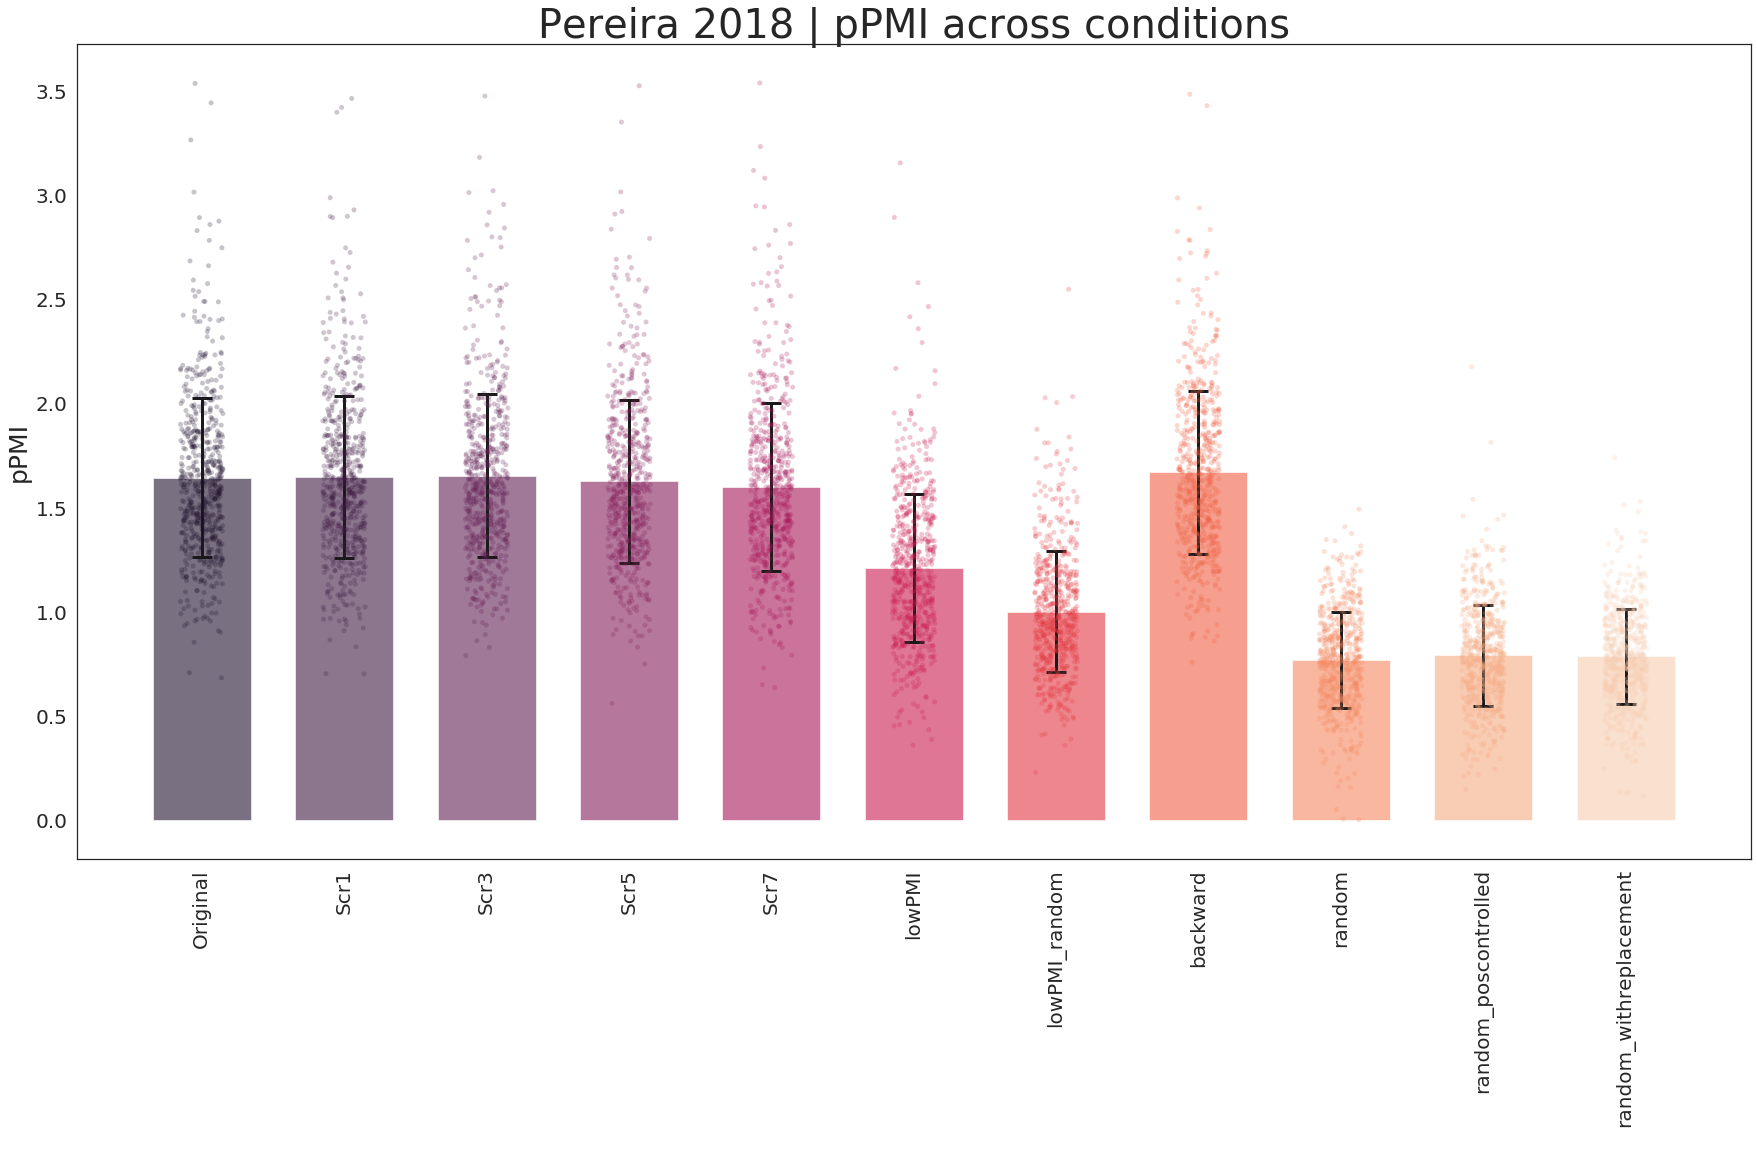

In [22]:
sns.set()
mypalette = sns.color_palette("rocket",11)
sns.set_palette(mypalette)
sns.set_style("white")

data_title='Pereira 2018 | pPMI across conditions'

fig_dims=(30,15)
fig, ax = plt.subplots(figsize=fig_dims)
capsize = 10

small_size = 40/2
medium_size = 50/2
title_size=80/2


sns.stripplot(x="condition", y="pPMI_lag2",data=data,alpha=0.25,palette = mypalette,dodge=True,ax=ax,jitter=0.15)
#space = np.linspace(-len(conditions)/2,len(conditions)/2,len(conditions))
width = (1/float(len(conditions)/10))/1.32
bar_ind = np.arange(len(conditions))
for ind, ppmi in enumerate(ppmi_mean):
    p1 = ax.bar(bar_ind[ind], ppmi, width,yerr=ppmi_mean_errors[ind], #edgecolor='black',
                error_kw=dict(lw=3, capsize=capsize, capthick=3), alpha = 0.6)

ax.set(ylabel='pPMI',xlabel=' ')
ax.yaxis.label.set_size(medium_size)
ax.set_title(data_title, fontsize=title_size) # Add the text/suptitle to figure
ax.tick_params(axis='x', labelsize=small_size, rotation=90)
ax.tick_params(axis='y', labelsize=small_size)

if save:
    plt.savefig(os.path.join(figdir,'pmi_verification_scr.png'), bbox_inches='tight')

# T-test

In [23]:
from scipy.stats import ttest_ind

cat1 = data[data['condition']=='Original']
cat2 = data[data['condition']=='Scr1']

ttest_ind(cat1['pPMI_lag2'], cat2['pPMI_lag2'])

Ttest_indResult(statistic=-0.1279849982297373, pvalue=0.8981813987865976)

In [24]:
cat1 = data[data['condition']=='Original']
cat2 = data[data['condition']=='Scr7']

ttest_ind(cat1['pPMI_lag2'], cat2['pPMI_lag2'])

Ttest_indResult(statistic=2.10291487766671, pvalue=0.03567239599623254)

In [25]:
cat1 = data[data['condition']=='Scr7']
cat2 = data[data['condition']=='lowPMI']

ttest_ind(cat1['pPMI_lag2'], cat2['pPMI_lag2'])

Ttest_indResult(statistic=18.07021744027508, pvalue=4.869155015700215e-65)

The larger the t score, the more difference there is between groups. The smaller the t score, the more similarity there is between groups. A t score of 3 means that the groups are three times as different from each other as they are within each other. 

In [26]:
#!pip3 install scikit_posthocs

In [27]:
import scipy.stats as stats
import scikit_posthocs as sp

['Original', 'Scr1', 'Scr3', 'Scr5', 'Scr7', 'lowPMI', 'lowPMI_random', 'backward', 'random', 'random_poscontrolled', 'random_withreplacement']
11
ANOVA F-statistic and p-value: (852.5201720830863, 0.0)
                        Original  Scr1  Scr3  Scr5  Scr7  lowPMI  \
Original                    -1.0   0.0   0.0   0.0   3.0     1.0   
Scr1                         0.0  -1.0   0.0   0.0   3.0     1.0   
Scr3                         0.0   0.0  -1.0   0.0   3.0     1.0   
Scr5                         0.0   0.0   0.0  -1.0   0.0     1.0   
Scr7                         3.0   3.0   3.0   0.0  -1.0     1.0   
lowPMI                       1.0   1.0   1.0   1.0   1.0    -1.0   
lowPMI_random                1.0   1.0   1.0   1.0   1.0     1.0   
backward                     0.0   0.0   0.0   3.0   2.0     1.0   
random                       1.0   1.0   1.0   1.0   1.0     1.0   
random_poscontrolled         1.0   1.0   1.0   1.0   1.0     1.0   
random_withreplacement       1.0   1.0   1.0   1.

,Original,Scr1,Scr3,Scr5,Scr7,lowPMI,lowPMI_random,backward,random,random_poscontrolled,random_withreplacement
Original,1.000000e+00,8.981814e-01,6.489140e-01,4.135887e-01,3.567240e-02,6.502622e-83,1.259236e-176,2.310008e-01,1.606677e-293,2.029500e-279,6.078178e-287
Scr1,8.981814e-01,1.000000e+00,7.446476e-01,3.476536e-01,2.691762e-02,7.108312e-83,1.031365e-175,2.873155e-01,2.071552e-291,1.725790e-277,7.056084e-285
Scr3,6.489140e-01,7.446476e-01,1.000000e+00,2.075318e-01,1.156887e-02,9.855187e-85,1.325501e-177,4.611765e-01,8.464987e-293,5.932967e-279,2.657642e-286
Scr5,4.135887e-01,3.476536e-01,2.075318e-01,1.000000e+00,1.996163e-01,1.264556e-75,5.904381e-166,4.629718e-02,1.913731e-280,1.054953e-266,6.782731e-274
Scr7,3.567240e-02,2.691762e-02,1.156887e-02,1.996163e-01,1.000000e+00,4.869155e-65,2.312135e-150,1.185111e-03,1.758301e-261,3.193456e-248,5.706118e-255
lowPMI,6.502622e-83,7.108312e-83,9.855187e-85,1.264556e-75,4.869155e-65,1.000000e+00,4.789375e-29,9.568656e-90,2.963906e-120,5.119063e-108,3.118949e-113
lowPMI_random,1.259236e-176,1.031365e-175,1.325501e-177,5.904381e-166,2.312135e-150,4.789375e-29,1.000000e+00,1.706718e-183,2.974598e-50,1.113676e-40,3.944572e-44
backward,2.310008e-01,2.873155e-01,4.611765e-01,4.629718e-02,1.185111e-03,9.568656e-90,1.706718e-183,1.000000e+00,1.738645e-298,1.144696e-284,4.865689e-292
random,1.606677e-293,2.071552e-291,8.464987e-293,1.913731e-280,1.758301e-261,2.963906e-120,2.974598e-50,1.738645e-298,1.000000e+00,1.120139e-01,2.055185e-01
random_poscontrolled,2.029500e-279,1.725790e-277,5.932967e-279,1.054953e-266,3.193456e-248,5.119063e-108,1.113676e-40,1.144696e-284,1.120139e-01,1.000000e+00,7.182382e-01


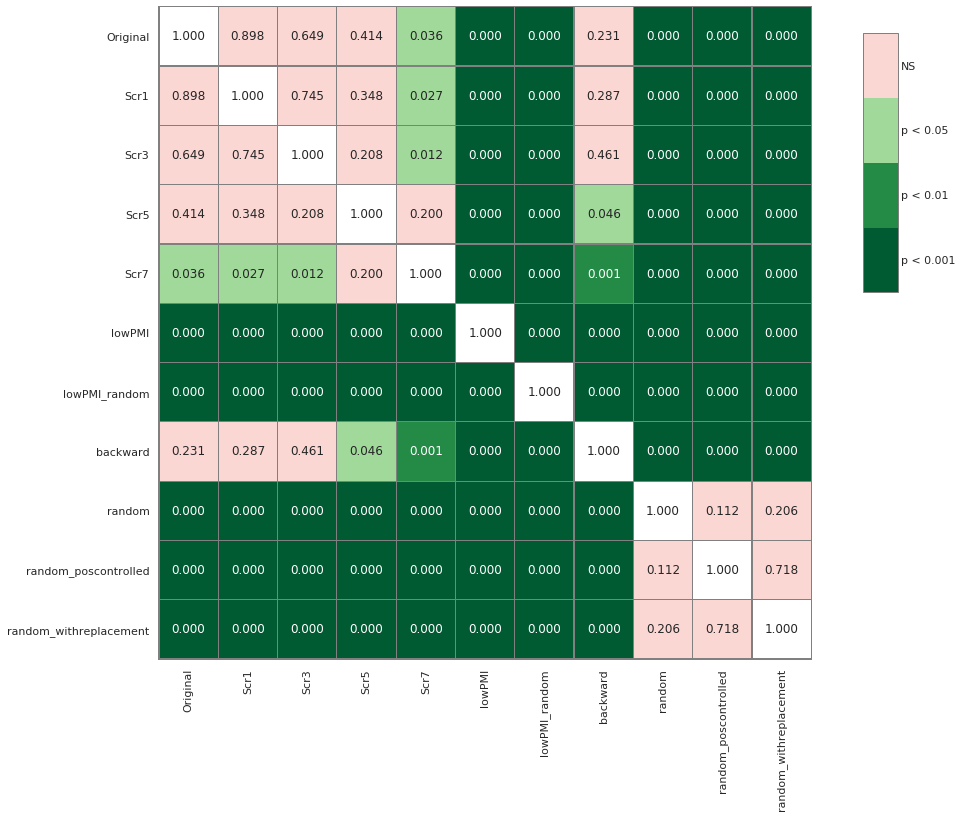

In [28]:
# Plot arguments
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.95, 0.55, 0.04, 0.3]}

def anova_ttest():
    liste = []
    print(conditions)
    for condition in conditions:
        curr_df = data.loc[data['condition'] == condition]
        cat = np.array(curr_df['pPMI_lag2'])
        liste.append(cat)
    print(len(liste))
    F, p = stats.f_oneway(liste[0],liste[1],liste[2],liste[3],liste[4],liste[5],liste[6],
                         liste[7],liste[8],liste[9],liste[10])
    print(f'ANOVA F-statistic and p-value: {F,p}')
    
    ttest = sp.posthoc_ttest(data, val_col='pPMI_lag2', group_col='condition')#, p_adjust='fdr_bh')
    plt.figure(figsize=(12,12))
    sp.sign_plot(ttest, annot=ttest, fmt='.3f', **heatmap_args)
    #plt.title('Pereira 2018 | pPMI across conditions', fontsize=title_size)
    #plt.subplots_adjust(top=0.8) 
    
    if save:
        plt.savefig(os.path.join(figdir,'pmi_verification_scr_stats.png'), bbox_inches='tight')

    return ttest
anova_ttest()